# Basic Adaptive Policy Trial

In [13]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import adaptive_nof1

# Quick tests without costly sampling

In [7]:
from adaptive_nof1.metrics import SimpleRegret, FrequentistOptimalSelection
from adaptive_nof1.simulation import Simulation

metrics = [SimpleRegret(), FrequentistOptimalSelection()]
df, simulations = Simulation.simulation_study(
    [SinotModel("sinot/example/example_params.json") for _ in range(7 * 10)],
    [
        BlockPolicy(
            FixedPolicy(
                number_of_actions=2,
            ),
            block_length=20,
        ),
        BlockPolicy(
            FrequentistEpsilonGreedy(
                number_of_actions=2,
                epsilon=0.1,
            ),
            block_length=20,
        ),
        BlockPolicy(
            FrequentistEpsilonGreedy(
                number_of_actions=2,
                epsilon=0.5,
            ),
            block_length=20,
        ),
        BlockPolicy(
            FrequentistExploreThenCommit(number_of_actions=2, explore_blocks=4),
            block_length=20,
        ),
        BlockPolicy(
            ThompsonSampling(
                number_of_actions=2,
            ),
            block_length=20,
        ),
        BlockPolicy(
            UpperConfidenceBound(
                number_of_actions=2,
                epsilon=0.05,
            ),
            block_length=20,
        ),
        BlockPolicy(
            UpperConfidenceBound(
                number_of_actions=2,
                epsilon=0.2,
            ),
            block_length=20,
        ),
    ]
    * 10,
    metrics,
    200,
)

AttributeError: type object 'Simulation' has no attribute 'simulation_study'

/var/folders/2g/v44yvb1n6sdgnp5mwbh8_qgc0000gn/T/ipykernel_6163/1748330870.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


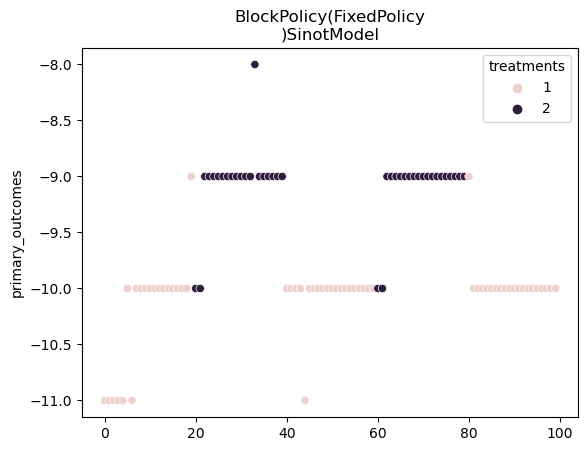

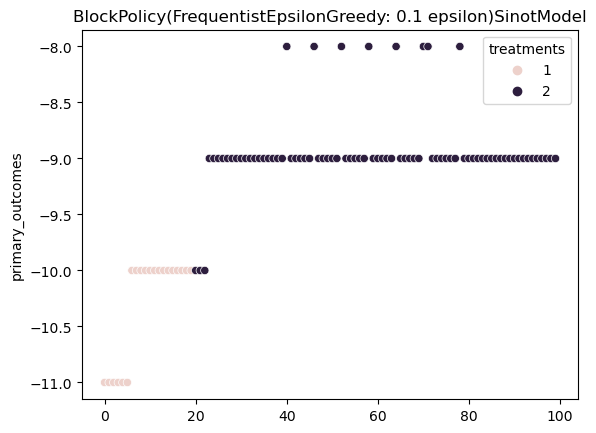

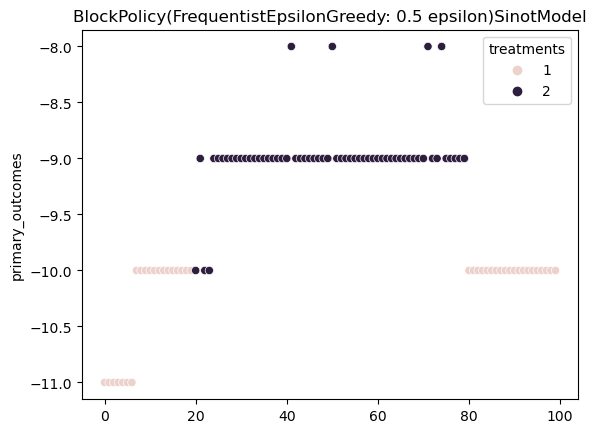

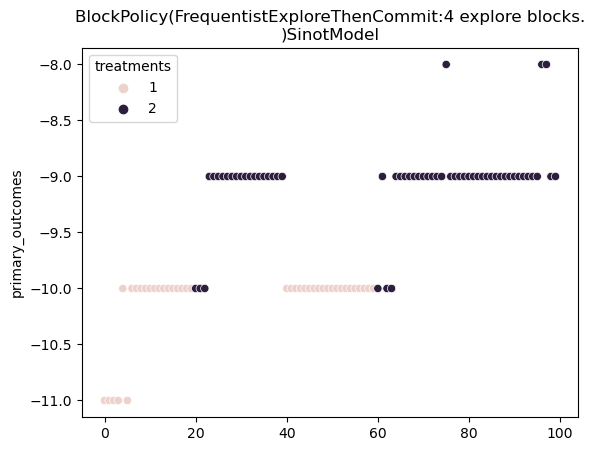

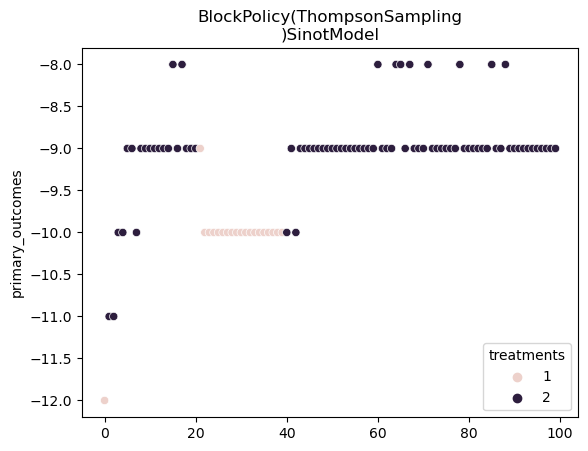

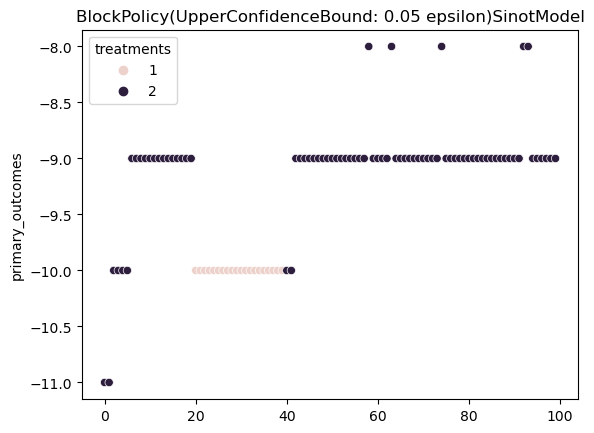

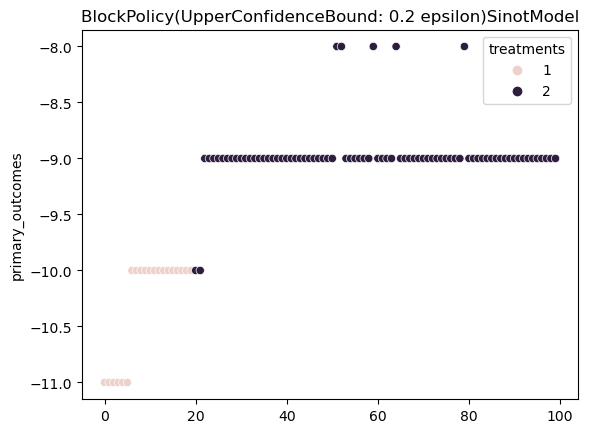

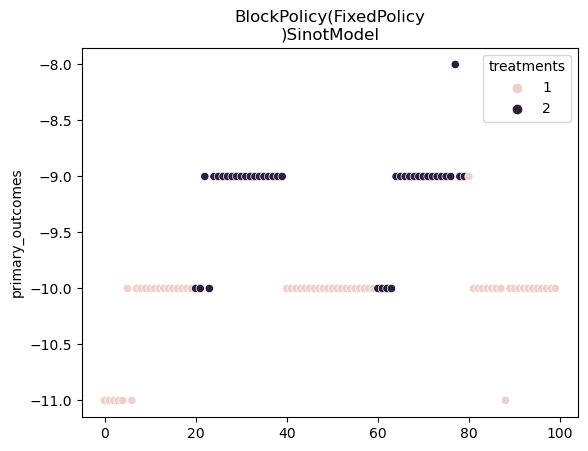

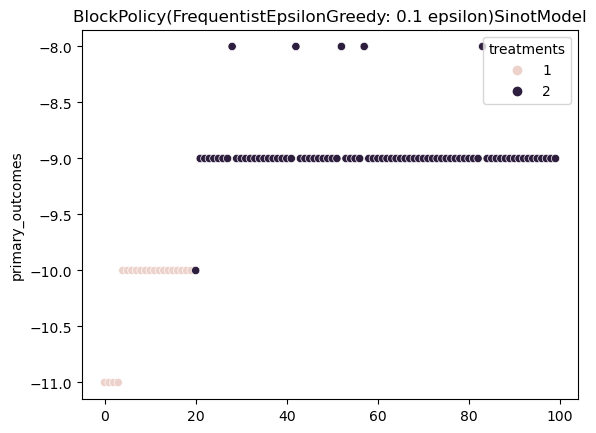

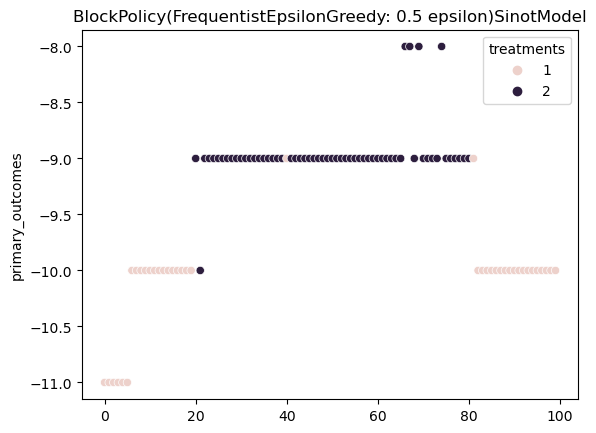

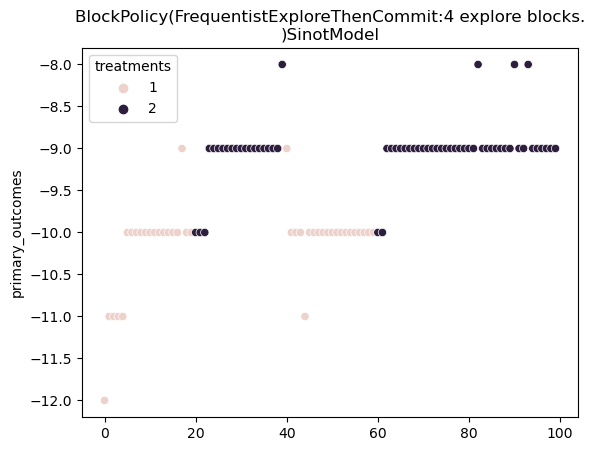

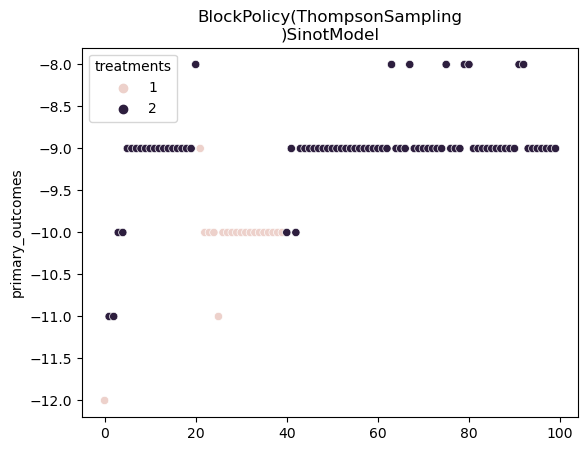

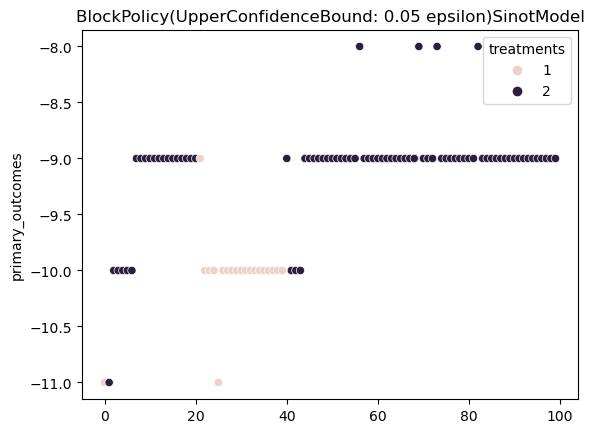

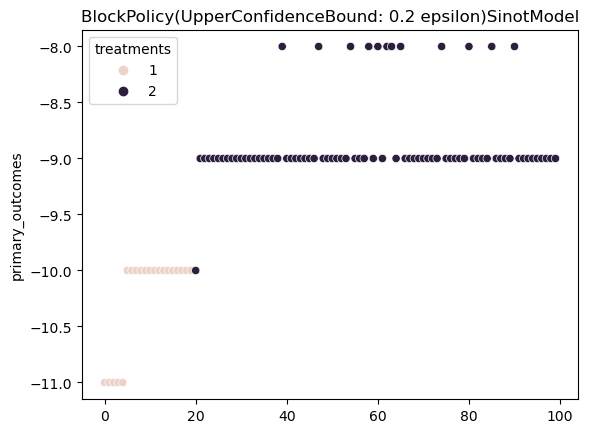

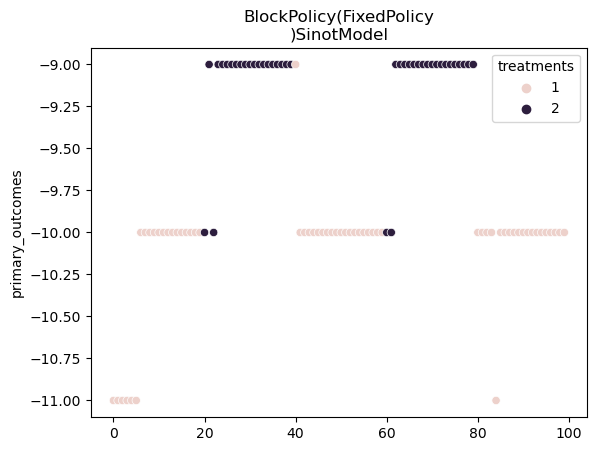

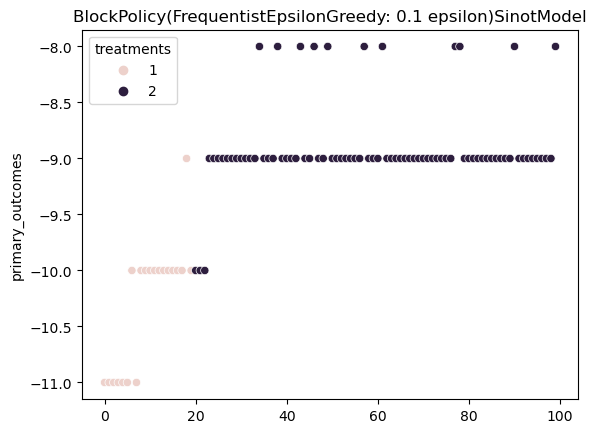

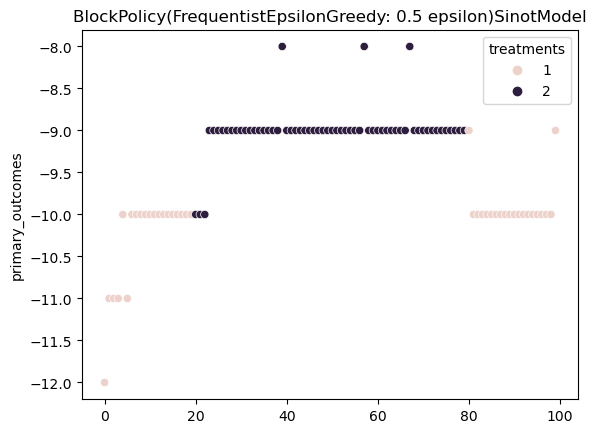

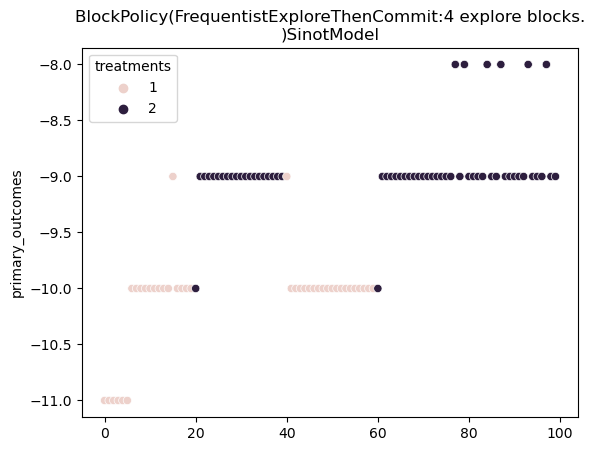

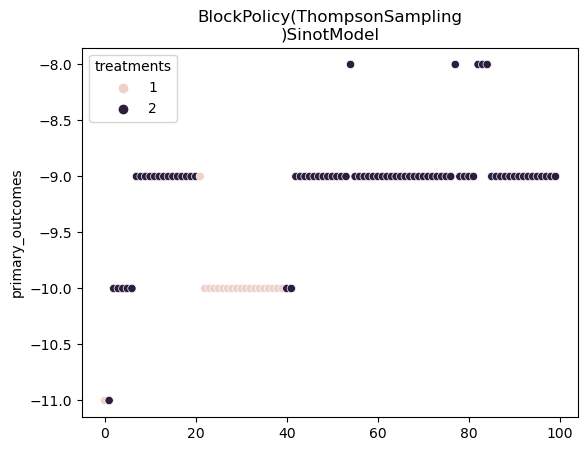

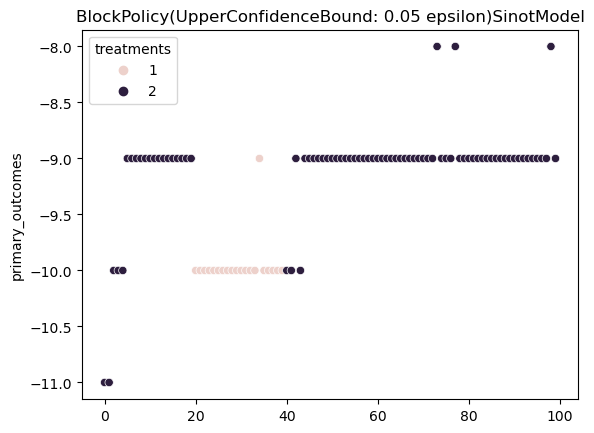

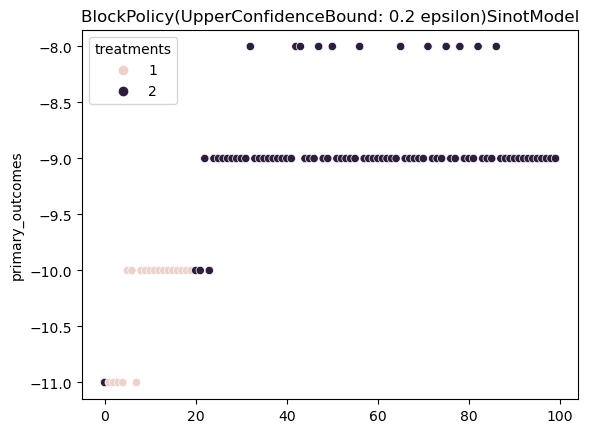

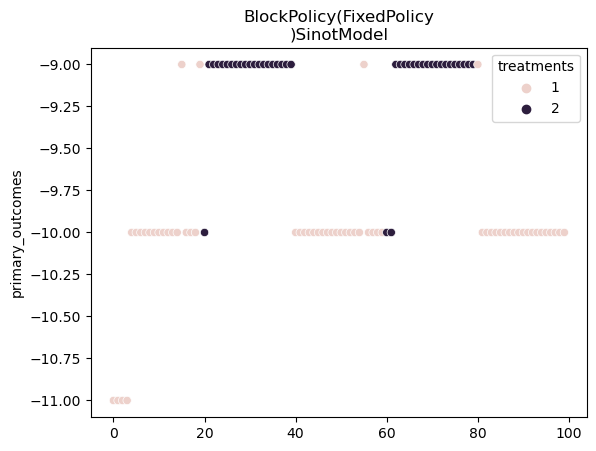

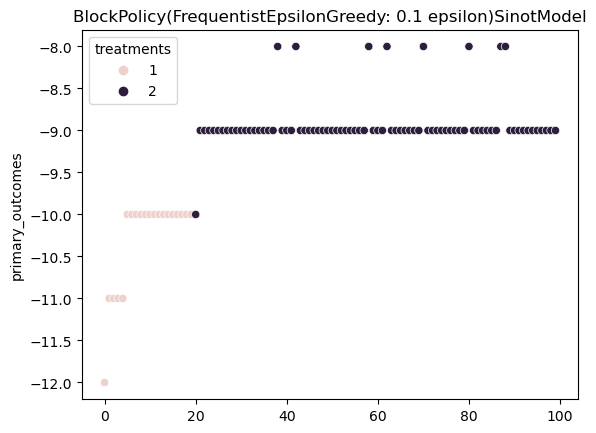

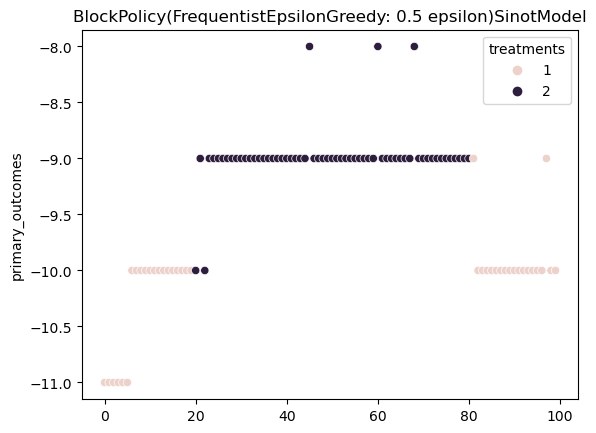

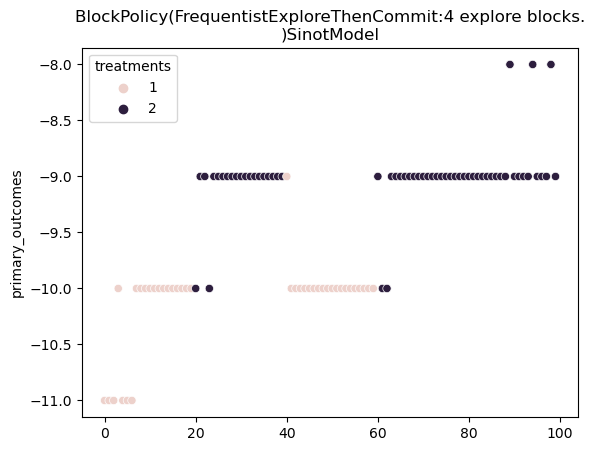

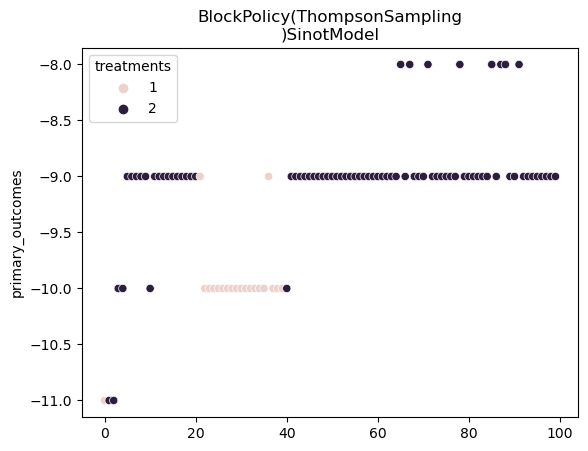

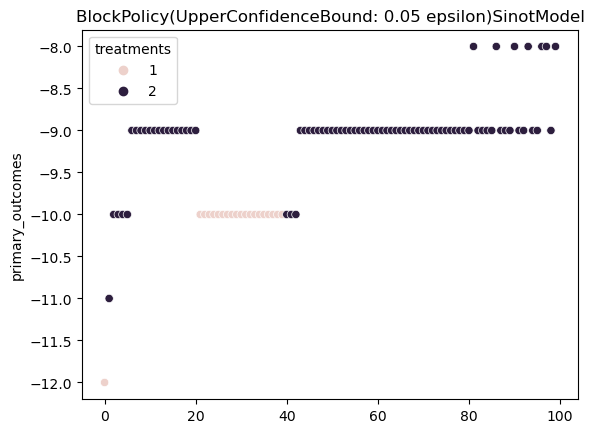

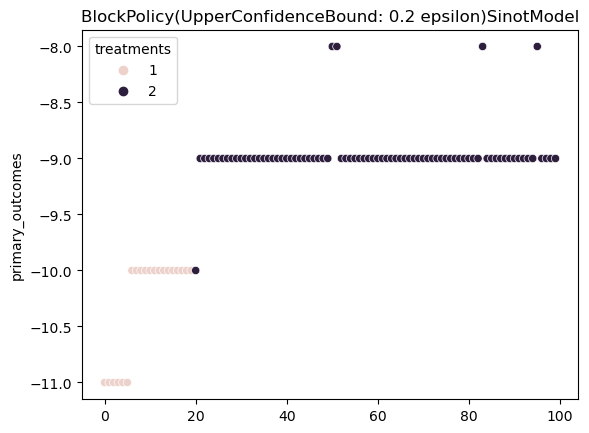

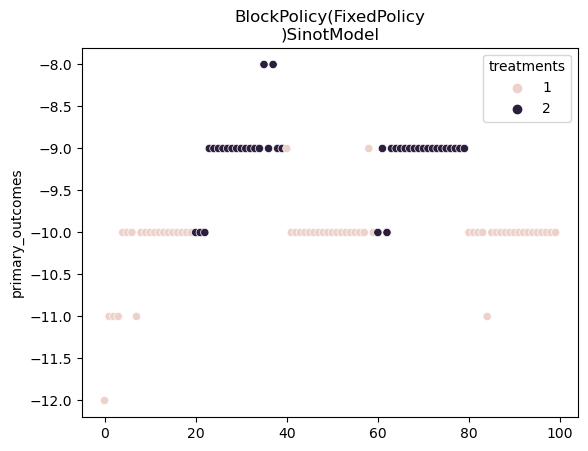

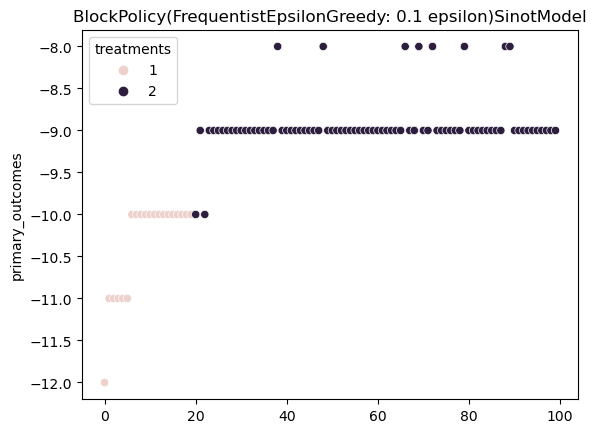

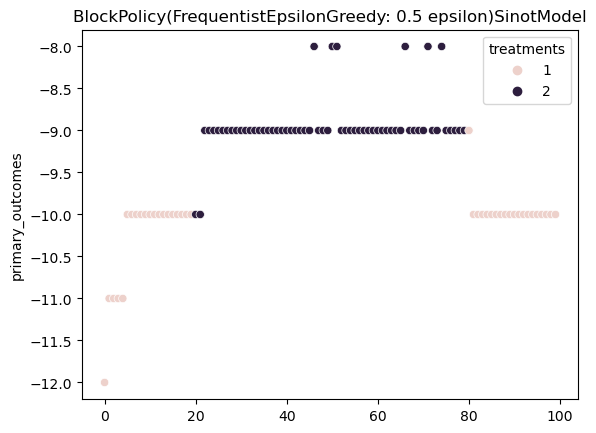

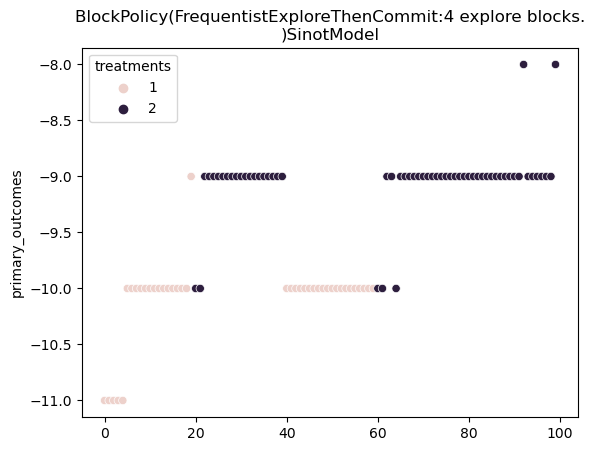

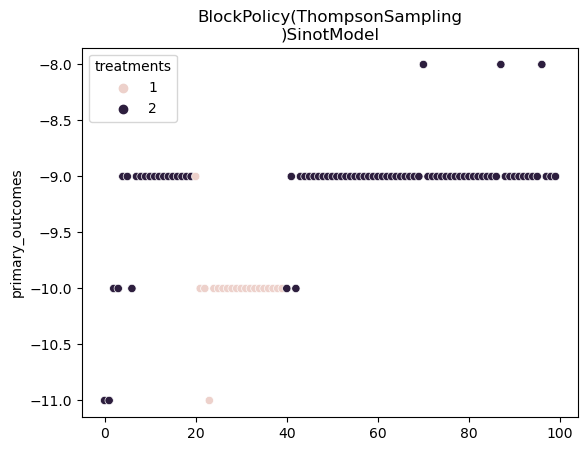

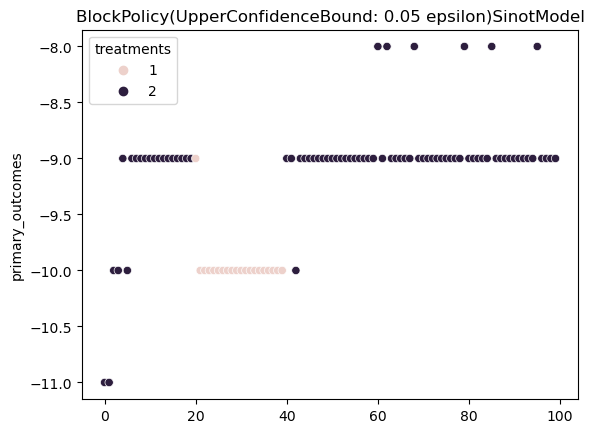

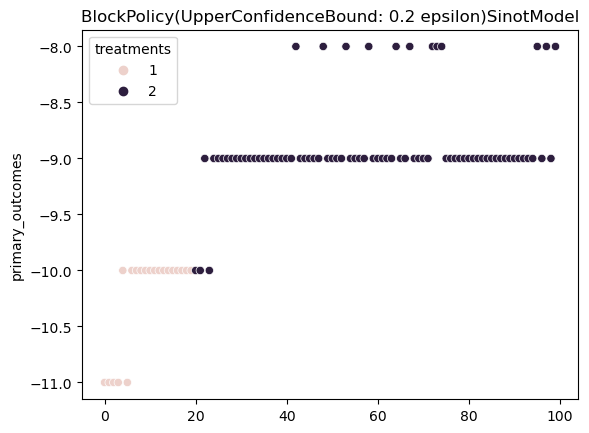

In [46]:
for simulation in simulations:
    plt.figure()
    simulation.plot()

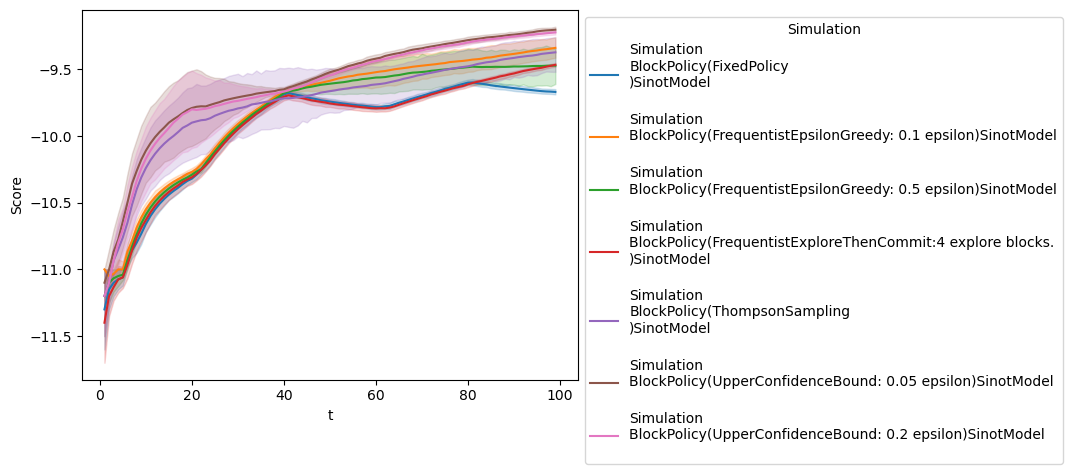

In [70]:
df = score_df_iterative(simulations, [SimpleRegret()], range(1, 100))
ax = sns.lineplot(data=df, x="t", y="Score", hue="Simulation")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Testing the SinotSimulation with different patients under the same policy (similar to series of N-of-1 Trials)

In [17]:
from adaptive_nof1 import *
from adaptive_nof1.policies import *
from adaptive_nof1.metrics import plot_score, SimpleRegret, FrequentistOptimalSelection, score_df
from adaptive_nof1.models import SinotModel

series = SeriesOfSimulations(
   lambda patient_id: SinotModel("../src/sinot/example/example_params.json", patient_id),
   10,
   ThompsonSampling(
       number_of_actions= 2,
   ),
)
series2 = SeriesOfSimulations(
    lambda patient_id: SinotModel("../src/sinot/example/example_params.json", patient_id),
    10,
    FrequentistEpsilonGreedy(
        number_of_actions=2,
        epsilon=0.1,
    ),
)
# series

Step:   0%|          | 0/100 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment_effect]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [random_noise_variance, average_treatment

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Step:   0%|          | 0/100 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation:   0%|          | 0/10 [00:00<?, ?it/s]

Simulation         Metric  \
0   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
1   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
2   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
3   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
4   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
..                                                ...            ...   
5   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
6   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
7   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
8   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   
9   Simulation\nBlockPolicy(FrequentistEpsilonGree...  Simple Regret   

        Score   t  
0  -11.000000   1  
1  -11.000000   1  
2  -11.000000   1  
3  -11.000000   1  
4  -12.000000   1  
..        ...  ..  
5   -9.181818  99  
6   -9.202020  99  
7   -9.202020  99  
8   -9.464646  99  
9   -9.454545  99  

[990 rows x 4 columns]

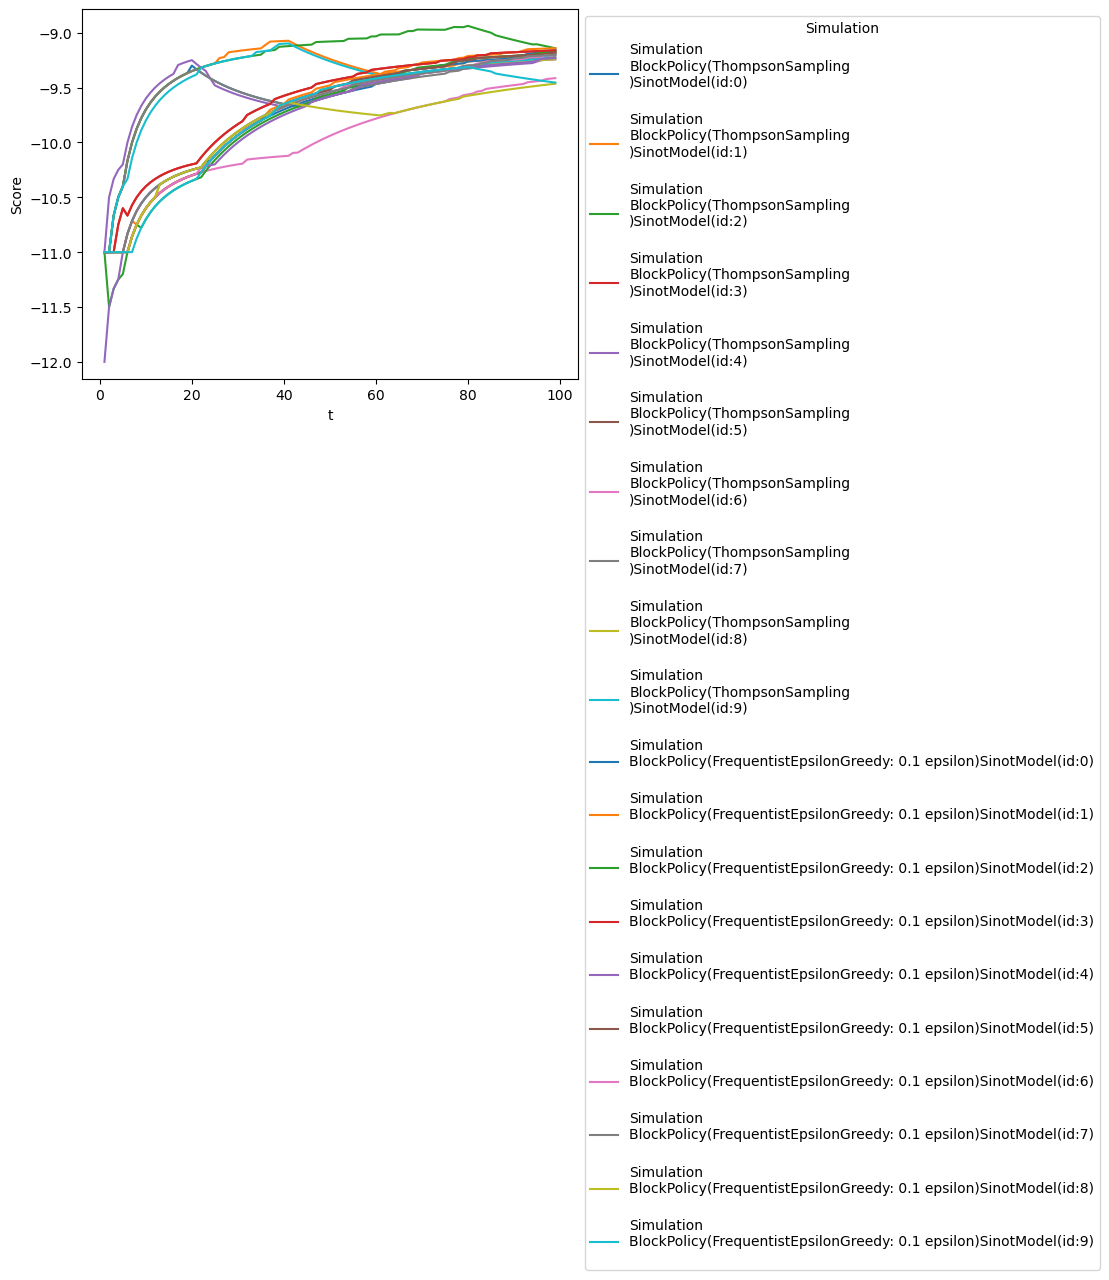

In [18]:
series.plot_line(SimpleRegret())
series2.plot_line(SimpleRegret())

In [20]:
series.plot_allocations()
series2.plot_allocations()

HoloViews(HeatMap, height=300, sizing_mode='fixed', width=700)